In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.ndim

2

In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
6,SibSp,0,0.000000
7,Parch,0,0.000000


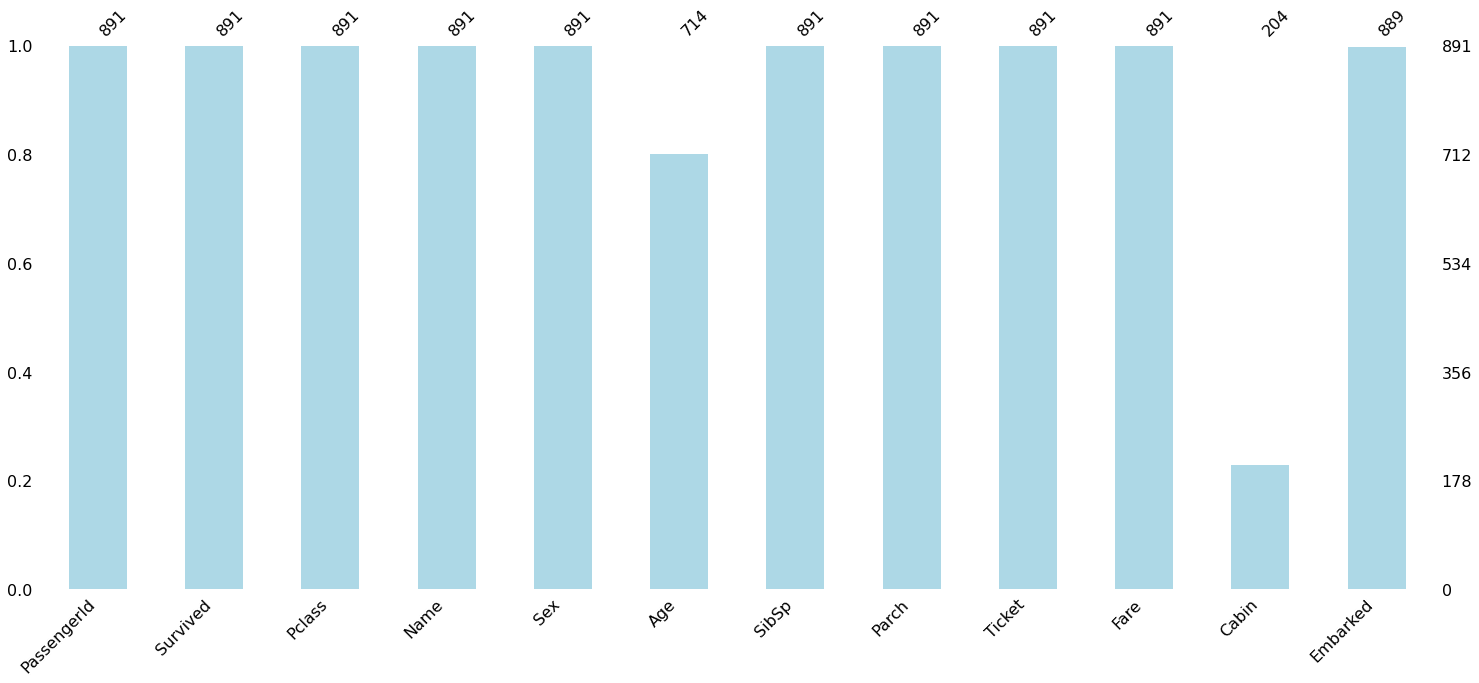

In [13]:
import missingno as no
no.bar(df,color='lightblue')
plt.show()

In [14]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()

False

In [15]:
df.drop(columns='Cabin' , inplace=True)

In [16]:
df.dropna(subset=['Embarked'],inplace=True)


In [17]:
df.shape


(889, 11)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

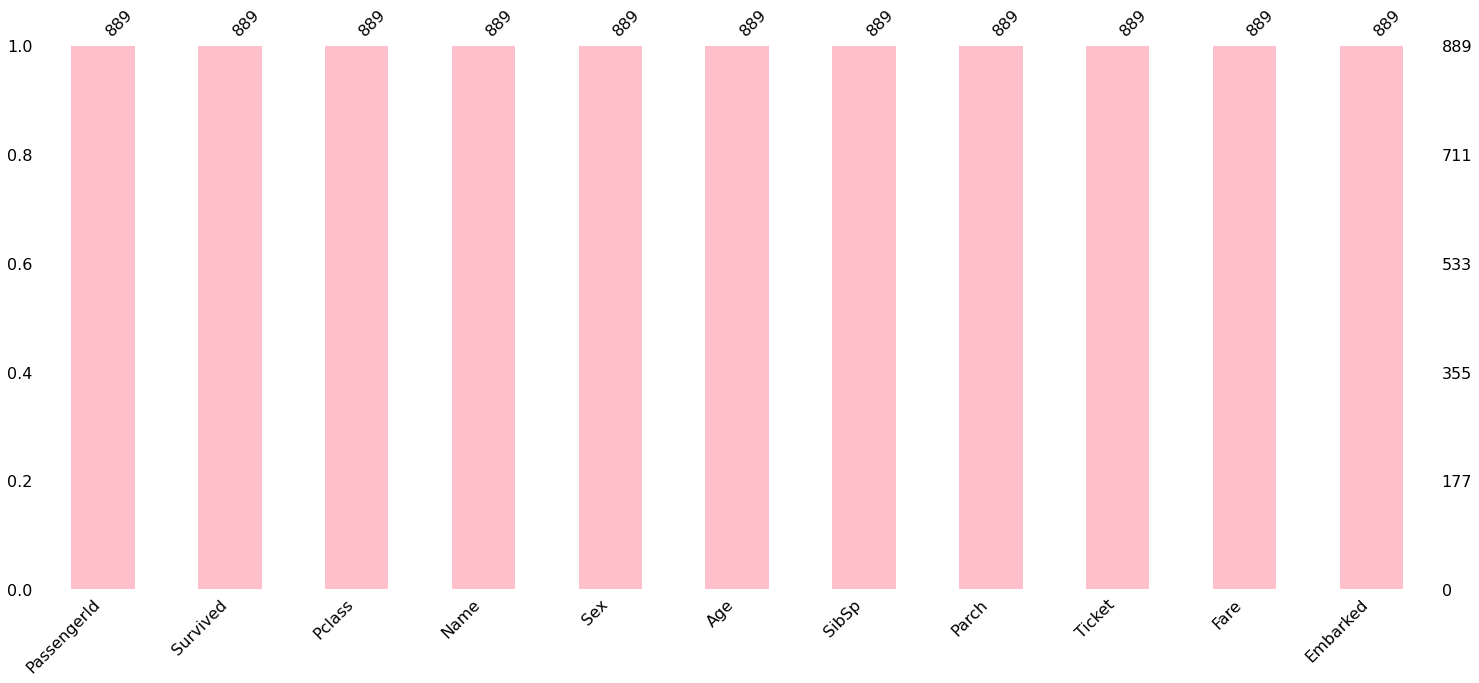

In [19]:
no.bar(df,color='pink')

### Data Preprocessing

In [21]:
import  yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()

In [22]:
df.Sex =label_Enc.fit_transform(df.Sex)

In [23]:
label_Enc.classes_

array(['female', 'male'], dtype=object)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


<ipython-input-25-0960bdc0efd7>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))


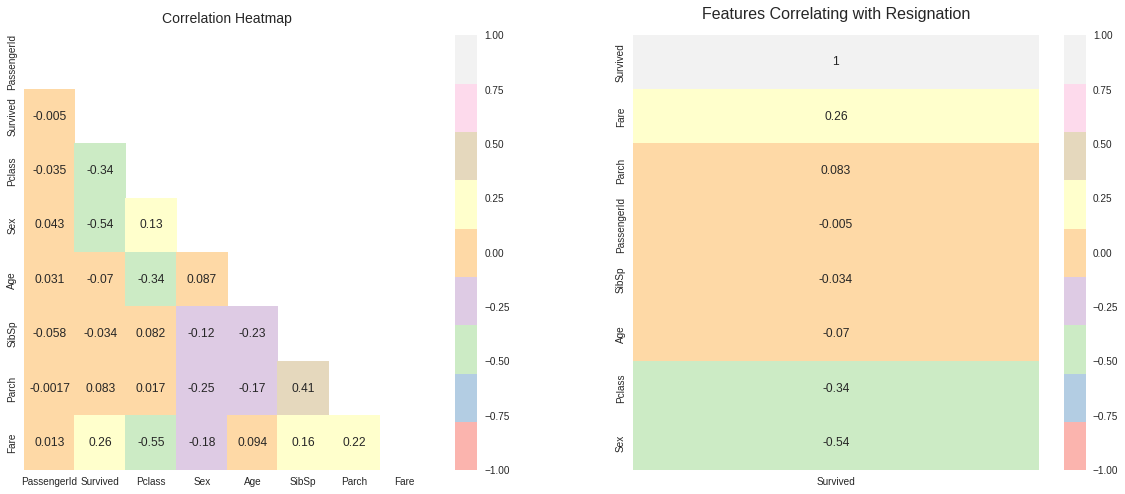

In [25]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Pastel1')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Survived']].sort_values(by='Survived',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Pastel1')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

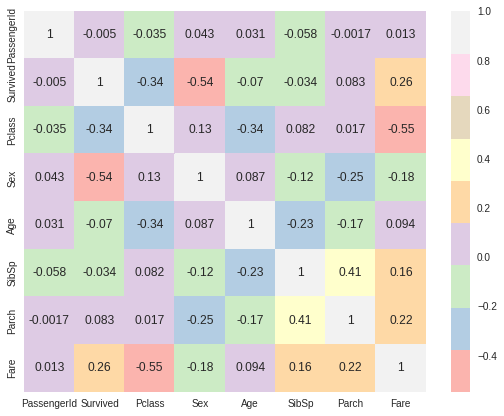

In [26]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

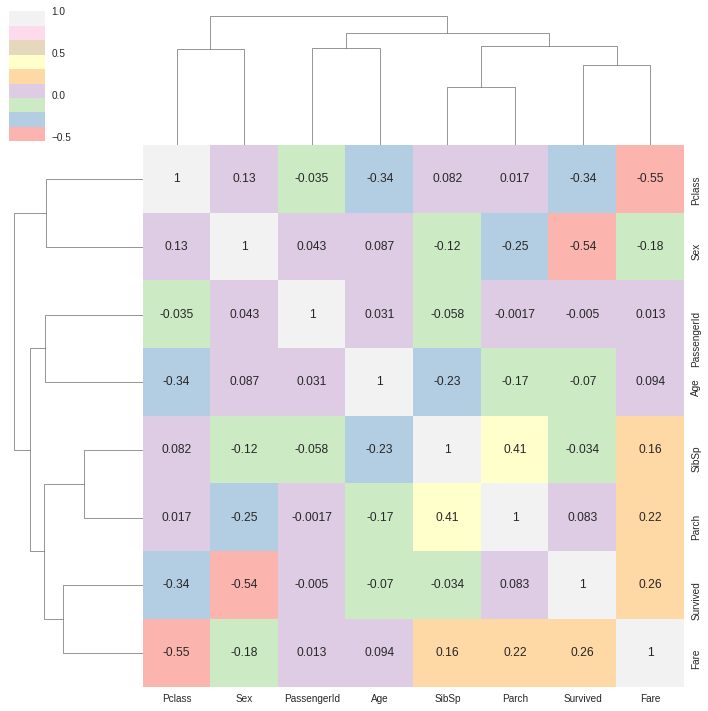

In [27]:
sns.clustermap(df.corr(),annot=True,cmap='Pastel1')

### Dataset Splitting

In [28]:
X=df.drop(['Survived','Name','Ticket','Embarked'],axis=1)
y=df['Survived']

In [29]:
X[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250


In [30]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

### Gaussian Naive Bayes Calssifier

In [32]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb_clf=GaussianNB()

In [35]:
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [36]:
y_pred = gnb_clf.predict(X_test)

In [37]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.7921348314606742


In [38]:
print("Recall Score",recall_score(y_test,y_pred))

Recall Score 0.7058823529411765


In [39]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.7384615384615385


In [40]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.7218045112781954


### Confusion Matrix

In [41]:
confusion_matrix(y_test, y_pred)

array([[93, 17],
       [20, 48]])

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


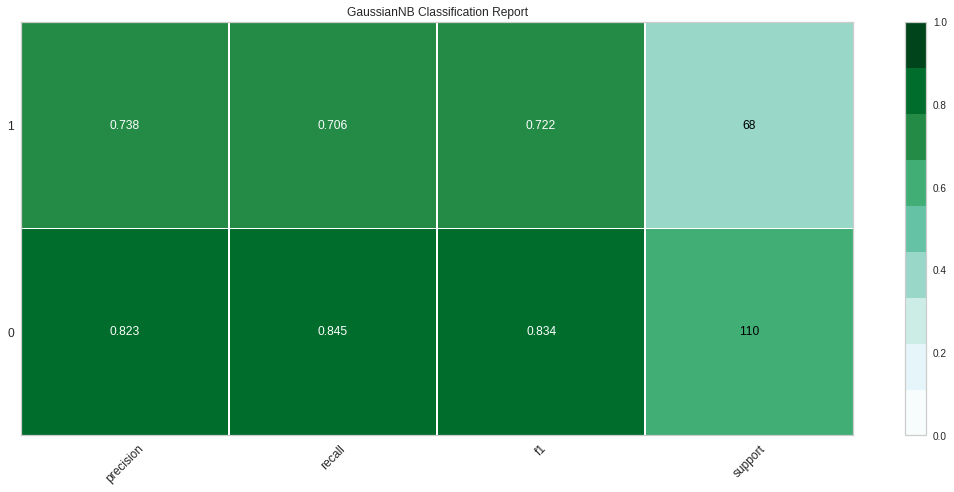

In [43]:
import yellowbrick as yb
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(gnb_clf, X_train, y_train, X_test, y_test,  support=True,cmap="BuGn")
visualizer.show()
plt.show()